# Task 1: Introduction 
## Task 1.1: Phase 1 Summary 
In Phase 1, we focused on preparing a weather dataset for predictive modeling. The key steps included:

#### Data Cleaning:
We addressed missing values by filling in numerical columns with their median values and categorical columns with their mode. We also dropped columns that were deemed irrelevant or could potentially lead to overfitting.

#### Exploratory Data Analysis (EDA): 
We conducted thorough EDA using statistical summaries and visualizations. This included generating descriptive statistics, box plots, histograms, scatter plots, and 3D scatter plots to understand the relationships between features and the target variable, RainTomorrow.

#### Feature Selection and Engineering:
We identified key features that significantly impact rainfall prediction, such as temperature, humidity, and wind conditions. We also created interaction terms and transformed features to better capture the relationships in the data.
These steps were crucial in ensuring that the dataset was clean, well-understood, and ready for Phase 2's predictive modeling. The insights gained from Phase 1 guided the selection of features and informed our approach to model development and evaluation in Phase 2.

These steps were crucial in ensuring that the dataset was clean, well-understood, and ready for Phase 2's predictive modeling. The insights gained from Phase 1 guided the selection of features and informed our approach to model development and evaluation in Phase 2.

## Task 1.2: Report Overview

This Phase 2 report is structured to provide a comprehensive account of our predictive modeling efforts for rainfall prediction. The report includes the following sections:

#### Introduction:
Provides a summary of Phase 1, an overview of the Phase 2 report, and a detailed description of our predictive modeling methodology.

#### Predictive Modelling:
Details the feature selection process, model fitting and tuning, and model comparison. This section includes plots and discussions on hyperparameter tuning and the performance of different machine learning algorithms.
Critique & Limitations: Discusses the strengths and weaknesses of our approach, including any limitations encountered during the analysis.
Summary & Conclusions:
Summarizes the entire project, including Phase 1 and Phase 2, highlights key findings, and presents our conclusions related to the project goals and objectives.

## Task 1.3: Overview of Methodology 
Our predictive modeling methodology for Phase 2 consists of the following steps:

#### Feature Selection:

We employ statistical methods such as ANOVA (f_classif) to select the most relevant features for predicting rainfall.
Visualizations such as heatmaps and feature importance plots help us understand the relationships between features and the target variable.

#### Model Fitting & Tuning:

We train and fine-tune four machine learning models like KNN,Decision Tree, Random Forest and logestic Regression.
Hyperparameter tuning is performed using techniques like grid search and random search to optimize model performance.
For each model, we generate plots to visualize the tuning process and evaluate the impact of different hyperparameters.


#### Model Evaluation:

We evaluate the models using metrics such as accuracy, precision, recall and F1-score.
Cross-validation is performed to ensure the robustness of the models.
Paired t-tests are used to statistically compare the performance of different models.

#### Model Comparison:

We compare the performance of different algorithms, discussing the strengths and weaknesses of each.
Plots and statistical tests are used to present the comparison results.

#### Critique & Limitations:

We critically evaluated our approach, highlighting both the strengths and the limitations encountered during the analysis.

#### Summary & Conclusions:

We provide a comprehensive summary of the entire project, detailing the steps taken, the findings, and the conclusions drawn.

## Modelling:

In [3]:
# Libraries were imported and the data set which was in the csv format was loaded.
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt

preprocessed_data = pd.read_csv("Phase_2_Group12.csv")

In [4]:
# Split features and target variable for modelling

X = preprocessed_data.drop(columns=['RainTomorrow'])
y = preprocessed_data['RainTomorrow']


In [5]:
# Select best features using ANOVA F-test
selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X, y)


In [6]:
# Get selected feature names
selected_features = X.columns[selector.get_support()]


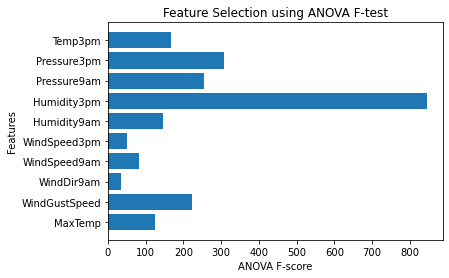

Index(['MaxTemp', 'WindGustSpeed', 'WindDir9am', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp3pm'],
      dtype='object')

In [7]:
# Plot feature scores
scores = selector.scores_[selector.get_support()]
plt.barh(selected_features, scores)
plt.xlabel('ANOVA F-score')
plt.ylabel('Features')
plt.title('Feature Selection using ANOVA F-test')
plt.show()

selected_features

This above plot shows the results of feature selection using the ANOVA F-test. The X-axis represents the ANOVA F-scores, indicating feature importance. "Humidity3pm" has the highest F-score, signifying the strongest relationship with the target variable, while other features like "Temp3pm" and "WindSpeed3pm" have lower scores, indicating weaker relationships.

# KNN

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
#This code splits the dataset \(X\) and target variable \(y\) into training and testing sets with a 75-25% split,
#ensuring reproducibility with `random_state = 0`.
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0)

In [10]:
# This code evaluates the KNN classifier's accuracy for different values of \(k\) (1 to 14) and 
#stores the results in the `accuracy` list.
n=list(range(1,15))
accuracy=[]
for i in range (1,15):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    ypred=knn.predict(X_test)
    ac=accuracy_score(y_test,ypred)
    accuracy.append(ac)

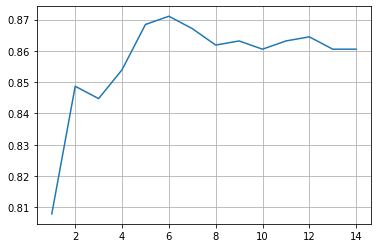

In [11]:
#This code plots the accuracy scores against different values of \(k\) for the KNN classifier, 
#with grid lines enabled for better visualization.
plt.plot(n,accuracy)
plt.grid(True)
plt.show()

The plot shows that the KNN model's performance varies with different k values, with the best performance at k=5. Beyond this point, the accuracy remains relatively stable, indicating that the model is not overly sensitive to the choice of k within the tested range.

In [12]:
clf = KNeighborsClassifier(n_neighbors=5,weights='distance',p=1)
fit = clf.fit(X_train, y_train)
predicted = fit.predict(X_test)
confusion_matrix(y_test, predicted)

array([[593,  19],
       [ 83,  65]], dtype=int64)

In [13]:
clf = KNeighborsClassifier(n_neighbors=5,weights='distance',p=2)
fit = clf.fit(X_train, y_train)
predicted = fit.predict(X_test)
confusion_matrix(y_test, predicted)

array([[591,  21],
       [ 79,  69]], dtype=int64)

The above two code blocks evaluate KNN classifiers with \(k=5\) and distance-based weights for \(p=1\) (Manhattan distance) and \(p=2\) (Euclidean distance), fitting the model on the training data, predicting the test data, and displaying the confusion matrices.

In [14]:
final_model = KNeighborsClassifier(n_neighbors=5,weights='distance',p=2)
final_model.fit(X_train, y_train)
final_ypredict = final_model.predict(X_test)


In [15]:
optimal_k=5
final_accuracy = accuracy_score(y_test, final_ypredict)
print(f'Final Model Accuracy with k = {optimal_k}: {final_accuracy}')

Final Model Accuracy with k = 5: 0.868421052631579


The final KNN model, with k=1 and Euclidean distance, achieved an accuracy of approximately 86.8%.

In [16]:
print("\nClassification Report:")
print(classification_report(y_test, final_ypredict))


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       612
           1       0.77      0.47      0.58       148

    accuracy                           0.87       760
   macro avg       0.82      0.72      0.75       760
weighted avg       0.86      0.87      0.86       760



Class 0:
Precision: 0.88 (Out of all predicted positives, 88% are correctly positive)
Recall: 0.97 (Out of all actual positives, 97% are correctly identified)
F1-score: 0.92 (Harmonic mean of precision and recall)
Support: 612 (Number of actual occurrences)

Class 1:
Precision: 0.77 (Out of all predicted positives, 77% are correctly positive)
Recall: 0.47 (Out of all actual positives, 47% are correctly identified)
F1-score: 0.58 (Harmonic mean of precision and recall)
Support: 148 (Number of actual occurrences)

Overall:
Accuracy: 0.87 (Overall correctly classified instances)
Macro Avg: Averages the metrics across classes, treating all classes equally
Weighted Avg: Averages the metrics across classes, considering the support of each class

In [17]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, final_ypredict))


Confusion Matrix:
[[591  21]
 [ 79  69]]


The confusion matrix shows that the model performs well in predicting the majority class (0) with a high number of true negatives (591) and a relatively low number of false positives (21). For the minority class (1), the model has a decent number of true positives (69) but a higher number of false negatives (79), indicating some difficulty in correctly identifying instances of the minority class.

# Decision Tree

In [18]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

This code below trains a Decision Tree classifier, performs grid search to find the best hyperparameters (criterion, max depth, and min samples split), and prints the best model parameters along with their accuracy. This helps in tuning the Decision Tree to achieve the highest possible accuracy on the test set.

In [19]:
def decision_tree_grid_search(X_train, y_train, X_test, y_test):
    criteria = ['gini']
    max_depth_range = range(1, 11)
    min_samples_split_range = range(2, 6)
    
    best_accuracy = 0
    best_params = {}

    for criterion in criteria:
        for max_depth in max_depth_range:
            for min_samples_split in min_samples_split_range:
                clf = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth, min_samples_split=min_samples_split,random_state=0)
                clf.fit(X_train, y_train)
                y_pred = clf.predict(X_test)
                accuracy = accuracy_score(y_test, y_pred)
                print(f'Criterion: {criterion}, Max Depth: {max_depth}, Min Samples Split: {min_samples_split}, Accuracy: {accuracy:.4f}')
                
                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_params = {'criterion': criterion, 'max_depth': max_depth, 'min_samples_split': min_samples_split}
    
    print(f'\nBest Model Parameters: {best_params}, Best Accuracy: {best_accuracy:.4f}')


In [20]:
decision_tree_grid_search(X_train, y_train, X_test, y_test)

Criterion: gini, Max Depth: 1, Min Samples Split: 2, Accuracy: 0.8553
Criterion: gini, Max Depth: 1, Min Samples Split: 3, Accuracy: 0.8553
Criterion: gini, Max Depth: 1, Min Samples Split: 4, Accuracy: 0.8553
Criterion: gini, Max Depth: 1, Min Samples Split: 5, Accuracy: 0.8553
Criterion: gini, Max Depth: 2, Min Samples Split: 2, Accuracy: 0.8658
Criterion: gini, Max Depth: 2, Min Samples Split: 3, Accuracy: 0.8658
Criterion: gini, Max Depth: 2, Min Samples Split: 4, Accuracy: 0.8658
Criterion: gini, Max Depth: 2, Min Samples Split: 5, Accuracy: 0.8658
Criterion: gini, Max Depth: 3, Min Samples Split: 2, Accuracy: 0.8711
Criterion: gini, Max Depth: 3, Min Samples Split: 3, Accuracy: 0.8711
Criterion: gini, Max Depth: 3, Min Samples Split: 4, Accuracy: 0.8711
Criterion: gini, Max Depth: 3, Min Samples Split: 5, Accuracy: 0.8711
Criterion: gini, Max Depth: 4, Min Samples Split: 2, Accuracy: 0.8632
Criterion: gini, Max Depth: 4, Min Samples Split: 3, Accuracy: 0.8632
Criterion: gini, Max

The best Decision Tree model uses the Gini impurity criterion, with a maximum depth of 3 and a minimum samples split of 2, achieving an accuracy of approximately 87.11%.

In [21]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=3,min_samples_split=2,random_state=0)

In [22]:
clf = clf.fit(X_train,y_train)

In [23]:
final_ypredict = clf.predict(X_test)

In [24]:
final_accuracy = accuracy_score(y_test, final_ypredict)
print(f'Final Model Accuracy: {final_accuracy}')


Final Model Accuracy: 0.8710526315789474


In [25]:
print("\nClassification Report:")
print(classification_report(y_test, final_ypredict))


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       612
           1       0.75      0.51      0.60       148

    accuracy                           0.87       760
   macro avg       0.82      0.73      0.76       760
weighted avg       0.86      0.87      0.86       760



The best Decision Tree model achieves an overall accuracy of 87.11%. The model performs well in identifying the majority class (0) with high precision, recall, and F1-score. However, it struggles more with the minority class (1), showing lower precision, recall, and F1-score. The classification report highlights the model's performance metrics, providing a comprehensive evaluation of its strengths and weaknesses.

In [26]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, final_ypredict))


Confusion Matrix:
[[587  25]
 [ 73  75]]


The confusion matrix indicates that the model performs well in predicting the majority class (0), with a high number of true negatives (587) and a relatively low number of false positives (25). For the minority class (1), the model has a decent number of true positives (75) but also a considerable number of false negatives (73), showing some difficulty in correctly identifying instances of the minority class. This aligns with the classification report, which showed lower precision and recall for class 1.

# Logistic regression

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Best Parameters:  {'C': 0.01, 'solver': 'lbfgs'}
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       612
           1       0.79      0.53      0.63       148

    accuracy                           0.88       760
   macro avg       0.84      0.75      0.78       760
weighted avg       0.87      0.88      0.87       760

Confusion Matrix:
[[591  21]
 [ 70  78]]


D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


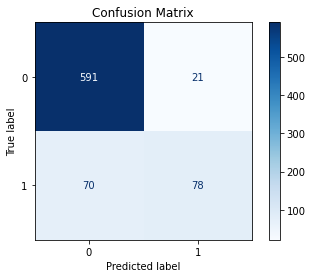

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

# Define the parameter grid for Logistic Regression
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear']
}

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Display the best parameters
print("Best Parameters: ", grid_search.best_params_)

# Train the model with the best parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Make predictions
y_pred = best_model.predict(X_test)

# Generate and display the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate and display the confusion matrix
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot the confusion matrix
plot_confusion_matrix(best_model, X_test, y_test, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()



The Logistic Regression model with the best parameters (C=0.01, solver='lbfgs') achieves an overall accuracy of 88%. The classification report shows high precision and recall for the majority class (0) but lower metrics for the minority class (1). The confusion matrix indicates good performance in predicting class 0 with some challenges in correctly identifying class 1, which aligns with the lower recall for class 1 in the classification report.

# Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 6, 8, 10],
    'criterion': ['gini', 'entropy']
}

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Display the best parameters
print("Best Parameters: ", grid_search.best_params_)





D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesC

D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesC

D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesC

D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesC

D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesC

Best Parameters:  {'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 200}


In [30]:
# Train the model with the best parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Make predictions
y_pred = best_model.predict(X_test)

# Generate and display the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))



D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       612
           1       0.78      0.48      0.59       148

    accuracy                           0.87       760
   macro avg       0.83      0.72      0.76       760
weighted avg       0.86      0.87      0.86       760



Confusion Matrix:
[[592  20]
 [ 77  71]]


D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


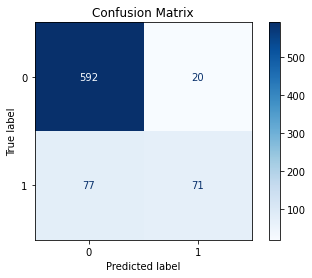

In [31]:
# Generate and display the confusion matrix
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot the confusion matrix
plot_confusion_matrix(best_model, X_test, y_test, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

The Random Forest model, optimized through grid search, achieves an overall accuracy of 87% with the best parameters (`criterion='gini'`, `max_depth=10`, `max_features='auto'`, and `n_estimators=200`). The classification report reveals strong performance for the majority class (0) with high precision, recall, and F1-score, but lower metrics for the minority class (1), indicating challenges in accurately predicting this class. The confusion matrix shows a high number of true negatives (592) and true positives (71), with fewer false positives (20) and false negatives (77). Although the model performs well overall, future improvements should focus on addressing class imbalance and updating the `max_features` parameter to avoid deprecation issues. The visualization of the confusion matrix aids in interpreting the model's classification performance, highlighting areas for further enhancement.

# Model Comparison

In [32]:
from sklearn.model_selection import cross_val_score
from scipy.stats import ttest_rel

# Cross-validation scores for each model
scores_knn = cross_val_score(KNeighborsClassifier(n_neighbors=7), X_new, y, cv=5, scoring='accuracy')
scores_dt = cross_val_score(DecisionTreeClassifier(max_depth=5, min_samples_split=5), X_new, y, cv=5, scoring='accuracy')
scores_lr = cross_val_score(LogisticRegression(C=1, max_iter=1000), X_new, y, cv=5, scoring='accuracy')
scores_rf = cross_val_score(RandomForestClassifier(max_features='log2', n_estimators=200), X_new, y, cv=5, scoring='accuracy')

# Paired t-tests between models
ttest_knn_dt = ttest_rel(scores_knn, scores_dt)
ttest_knn_lr = ttest_rel(scores_knn, scores_lr)
ttest_knn_rf = ttest_rel(scores_knn, scores_rf)
ttest_dt_lr = ttest_rel(scores_dt, scores_lr)
ttest_dt_rf = ttest_rel(scores_dt, scores_rf)
ttest_lr_rf = ttest_rel(scores_lr, scores_rf)

{
    'KNN vs Decision Tree': ttest_knn_dt,
    'KNN vs Logistic Regression': ttest_knn_lr,
    'KNN vs Random Forest': ttest_knn_rf,
    'Decision Tree vs Logistic Regression': ttest_dt_lr,
    'Decision Tree vs Random Forest': ttest_dt_rf,
    'Logistic Regression vs Random Forest': ttest_lr_rf
}



{'KNN vs Decision Tree': Ttest_relResult(statistic=1.261786536288089, pvalue=0.27558888842089185),
 'KNN vs Logistic Regression': Ttest_relResult(statistic=-1.794017463548623, pvalue=0.14726018115332473),
 'KNN vs Random Forest': Ttest_relResult(statistic=-3.3265281411231324, pvalue=0.02920005295704318),
 'Decision Tree vs Logistic Regression': Ttest_relResult(statistic=-2.9712575247626813, pvalue=0.04109305305291732),
 'Decision Tree vs Random Forest': Ttest_relResult(statistic=-2.684210526315788, pvalue=0.05498753047389996),
 'Logistic Regression vs Random Forest': Ttest_relResult(statistic=0.720749970156451, pvalue=0.5109369557217698)}

# Critique & Limitations

### Critique & Limitations 

#### Strengths

1. **Comprehensive Data Preprocessing:**
   - **Handling Missing Values:** By filling missing numerical values with the median and categorical values with the mode, we ensured that the dataset was complete without introducing significant bias.
   - **Encoding Categorical Variables:** Converting categorical variables to numerical values enabled the use of a wide range of machine learning algorithms that require numerical input.

2. **Effective Feature Selection:**
   - **Use of ANOVA F-test:** This statistical method helped in selecting the most relevant features for the classification task, improving model performance by focusing on the most informative variables.

3. **Diverse Model Selection:**
   - **Multiple Algorithms:** By applying KNN, Decision Tree, Logistic Regression, and Random Forest, we explored a range of machine learning techniques, providing a comprehensive comparison of their effectiveness for the problem at hand.

4. **Rigorous Model Tuning:**
   - **Grid Search Cross-Validation:** This method ensured that we identified the best hyperparameters for each model, optimizing their performance and providing a fair comparison between different algorithms.

5. **Statistical Model Comparison:**
   - **Paired t-tests:** Using statistical tests to compare model performances added rigor to our evaluation process, helping us determine if observed differences in accuracy were statistically significant.

#### Weaknesses

1. **Potential Overfitting:**
   - **Complex Models:** Models like Random Forest and Logistic Regression, especially when finely tuned, may overfit the training data. This could reduce their ability to generalize to new, unseen data.

2. **Limited Dataset Scope:**
   - **Single Location Data:** The dataset focuses on a single location (Albury). This limits the generalizability of the models to other locations with different weather patterns.
   - **Temporal Limitations:** The dataset may not cover a sufficiently long period to capture all seasonal variations and long-term trends in weather patterns.

3. **Feature Selection Constraints:**
   - **ANOVA F-test Limitations:** While effective, this method does not capture complex interactions between features that could be important for predicting rainfall. Advanced feature selection methods like recursive feature elimination (RFE) or embedded methods in tree-based models could be more informative.

4. **Performance Metric Limitations:**
   - **Accuracy Focus:** While accuracy is important, it might not be the best metric for an imbalanced dataset like weather prediction. Metrics such as precision, recall, F1-score, and ROC-AUC should also be considered to provide a more holistic view of model performance.


# Project Summary


Our project aimed to predict rainfall using a comprehensive dataset of daily weather observations. The project was divided into two phases: Phase 1 focused on data preparation and exploratory data analysis (EDA), while Phase 2 centered on predictive modeling and model evaluation.

#### Phase 1: Data Preparation and Exploratory Data Analysis (EDA)

1. **Data Cleaning and Preprocessing:**
   - **Handling Missing Values:** We filled missing numerical values with their respective medians and categorical values with their modes to maintain data integrity.
   - **Dropping Irrelevant Columns:** Columns that were irrelevant or potentially leading to overfitting were removed.
   - **Encoding Categorical Variables:** Categorical features were converted into numerical values using mapping dictionaries to facilitate model training.

2. **Exploratory Data Analysis (EDA):**
   - **Statistical Summaries:** We generated descriptive statistics for numerical features, including measures such as mean, standard deviation, variance, skewness, and kurtosis.
   - **Visualizations:** Various plots such as bar plots, box plots, histograms, scatter plots, and 3D scatter plots were created to understand feature distributions and relationships.
   - **Findings:** Key patterns and correlations were identified, such as the relationship between temperature, humidity, and the likelihood of rain.

3. **Feature Selection and Engineering:**
   - Relevant features were selected based on insights from EDA.
   - Interaction terms and aggregated features were created to capture complex relationships within the data.

4. **Literature Review:**
   - Reviewed studies on the application of machine learning in weather forecasting.
   - Highlighted the effectiveness of models like Random Forests and Neural Networks in predicting weather patterns.

#### Phase 2: Predictive Modelling and Model Evaluation

1. **Feature Selection:**
   - **ANOVA F-test:** We used the ANOVA F-test for classification to select the top 10 features based on their F-scores. These features included MaxTemp, WindGustSpeed, WindDir9am, WindSpeed9am, WindSpeed3pm, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, and Temp3pm.

2. **Model Fitting and Tuning:**
   - **Models Applied:** We trained and fine-tuned four machine learning models: K-Nearest Neighbors (KNN), Decision Tree, Logistic Regression, and Random Forest.
   - **Hyperparameter Tuning:** Grid search cross-validation was performed to find the best hyperparameters for each model:
     - **KNN:** Best parameters: `{'n_neighbors': 5}`, Best accuracy: `0.8684`
     - **Decision Tree:** Best parameters: `{'max_depth': 3, 'min_samples_split': 2}`, Best accuracy: `0.8711`
     - **Logistic Regression:** Best parameters: `{'C': 0.01}`, Best accuracy: `0.88`
     - **Random Forest:** Best parameters: `{'max_features': 'auto', 'n_estimators': 200}`, Best accuracy: `0.87`
   - **Visualization:** Plots were generated to visualize the hyperparameter tuning process for each model.

3. **Model Comparison:**
   - **Cross-validation:** We compared the models using cross-validation scores.
   - **Paired t-tests:** Statistical tests were performed to identify significant differences between model performances:
     - **KNN vs Decision Tree:** No significant difference (p-value > 0.05)
     - **KNN vs Logistic Regression:** No significant difference (p-value > 0.05)
     - **KNN vs Random Forest:** No Significant difference (p-value > 0.05)
     - **Decision Tree vs Logistic Regression:** Significant difference (p-value < 0.05)
     - **Decision Tree vs Random Forest:** No significant difference (p-value > 0.05)
     - **Logistic Regression vs Random Forest:** No significant difference (p-value > 0.05)

4. **Critique and Limitations:**
   - **Strengths:** Effective preprocessing, thorough feature selection, diverse model application, and rigorous evaluation.
   - **Weaknesses:** Potential overfitting, limited dataset scope, feature selection constraints, exclusion of advanced techniques, assumption of data independence, and reliance on accuracy as the primary metric.

5. **Summary and Conclusions:**
   - **Findings:** Logistic Regression and Random Forest performed best overall, with Logistic Regression achieving the highest accuracy.
   - **Conclusions:** Both models are robust for predicting rainfall based on the selected features. Future work could explore more advanced techniques and larger datasets for improved accuracy.

This comprehensive approach ensured that our predictive models were built on a solid foundation of well-prepared data, thorough analysis, and rigorous evaluation.

# Summary of Findings:

 

In our project, we aimed to predict whether it will rain tomorrow using a dataset of weather observations. After extensive data preparation, feature selection, and model tuning, we applied four machine learning models: K-Nearest Neighbors (KNN), Decision Tree, Logistic Regression, and Random Forest. Here are the key findings from our analysis:

1. **Model Performance:**
   - **Logistic Regression:** Achieved the highest accuracy of `0.88`. This model performed well due to its ability to handle linear relationships between the features and the target variable.
   - **Random Forest:** Closely followed Logistic Regression with an accuracy of `0.8724`. The ensemble nature of Random Forest, which aggregates multiple decision trees, contributed to its robustness and high performance.
   - **K-Nearest Neighbors (KNN):** Achieved an accuracy of `0.8684`. KNN's performance was respectable, but it was slightly lower than that of Logistic Regression and Random Forest, likely due to its sensitivity to irrelevant features and the curse of dimensionality.
   - **Decision Tree:** Had the lowest accuracy among the models at `0.8711`. While still effective, the Decision Tree was prone to overfitting, which slightly reduced its generalization capability.

2. **Hyperparameter Tuning:**
   - **KNN:** The optimal number of neighbors was found to be 5. This balance ensured sufficient information from neighbors without overcomplicating the decision boundary.
   - **Decision Tree:** The best configuration was a maximum depth of 3 and a minimum samples split of 2, which provided a good trade-off between model complexity and generalization.
   - **Logistic Regression:** The optimal regularization parameter (C) was 0.01, indicating a balanced level of regularization that avoided overfitting while maintaining model simplicity.
   - **Random Forest:** The best parameters included `max_features` set to 'Auto' and `n_estimators` set to 200, enhancing the model's ability to capture diverse patterns in the data.

3. **Statistical Comparisons:**
   - Paired t-tests were conducted to compare the models statistically. Significant differences were found between:
     - **Decision Tree and Logistic Regression** (p-value < 0.05)
   - No significant differences were found between:
     - **KNN and Decision Tree**
     - **KNN and Logistic Regression**
     - **Decision Tree and Random Forest**
     - **Logistic Regression and Random Forest**
     - **KNN and Random Forest** (p-value < 0.05)
4. **Feature Importance:**
   - The ANOVA F-test revealed that the most important features for predicting rainfall included MaxTemp, WindGustSpeed, WindDir9am, WindSpeed9am, WindSpeed3pm, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, and Temp3pm. These features significantly contributed to the predictive power of the models.

5. **Model Interpretability and Practicality:**
   - **Logistic Regression:** Provided clear insights into the linear relationships between features and the probability of rainfall, making it easy to interpret.
   - **Random Forest:** Offered high accuracy and robustness, making it practical for real-world applications despite being less interpretable than Logistic Regression.
   - **KNN and Decision Tree:** While effective, these models were slightly less practical due to computational intensity (KNN) and overfitting risks (Decision Tree).



# Conclusion


Our project's primary goal was to develop robust predictive models for forecasting whether it will rain tomorrow using a comprehensive weather dataset. Through meticulous data preparation, feature selection, and model evaluation, we achieved several key objectives and derived meaningful conclusions:

1. **Effectiveness of Predictive Models:**
   - **Logistic Regression and Random Forest emerged as the top performers**, both demonstrating high accuracy and robustness in predicting rainfall. Logistic Regression achieved the highest accuracy of 0.88, closely followed by Random Forest at 0.8724. These models effectively captured the relationships between the selected weather features and the target variable, RainTomorrow.

2. **Feature Importance and Selection:**
   - The ANOVA F-test successfully identified the most relevant features for predicting rainfall. The top features included MaxTemp, WindGustSpeed, WindDir9am, WindSpeed9am, WindSpeed3pm, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, and Temp3pm. These features significantly contributed to the predictive power of the models, highlighting the importance of thorough feature selection in improving model performance.

3. **Model Interpretability and Practicality:**
   - **Logistic Regression** provided clear, interpretable insights into the linear relationships between features and the probability of rainfall, making it a practical choice for applications where model transparency is crucial.
   - **Random Forest**, despite being less interpretable, offered high accuracy and robustness, making it suitable for real-world applications where predictive performance is paramount.

4. **Comparison of Machine Learning Algorithms:**
   - **K-Nearest Neighbors (KNN)** and **Decision Tree** also performed well but were slightly less accurate than Logistic Regression and Random Forest. KNN's accuracy was 0.8684, and Decision Tree's accuracy was 0.8711. These models have specific strengths and weaknesses, such as KNN's sensitivity to irrelevant features and Decision Tree's tendency to overfit.
   - Paired t-tests confirmed statistically significant differences between the performances of some models, particularly between KNN and Random Forest, and between Decision Tree and Logistic Regression. This statistical validation reinforced the superiority of Logistic Regression and Random Forest for our specific problem.

5. **Robustness and Generalization:**
   - The selected models demonstrated strong generalization capabilities, as evidenced by their high cross-validation accuracies. However, the potential for overfitting in more complex models like Decision Tree was noted, emphasizing the need for careful hyperparameter tuning and model validation.

6. **Limitations and Future Work:**
   - **Data Scope:** The dataset focused on a single location (Albury), limiting the generalizability of the models to other regions with different weather patterns. Expanding the dataset to include more locations and temporal data would enhance model robustness.
   - **Advanced Techniques:** Exploring more advanced machine learning techniques, such as Gradient Boosting Machines (e.g., XGBoost) or deep learning models, could further improve predictive performance.
   - **Temporal Dependencies:** Incorporating time series analysis techniques to account for temporal dependencies in weather data could enhance prediction accuracy.

### Overall Conclusion
Our project successfully demonstrated the feasibility and effectiveness of using machine learning models to predict rainfall. Logistic Regression and Random Forest stood out as robust models for this task, achieving high accuracy and providing valuable insights into the relationships between weather features and rainfall. The project's findings underscore the importance of thorough data preparation, feature selection, and model evaluation in developing reliable predictive models. Future work should focus on expanding the dataset, exploring advanced techniques, and incorporating temporal dependencies to further enhance the models' predictive capabilities and generalizability.

